In [1]:
# import warnings
# warnings.filterwarnings('ignore')
# import json
# import numpy as np
# import pandas as pd
# import random
# from matplotlib import pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud,STOPWORDS
# import missingno as msno

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# from keras.preprocessing import text
# import keras
# from keras.models import Sequential
# from keras.layers import Dense,Embedding,LSTM,Dropout
# from keras.callbacks import ReduceLROnPlateau

# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import nltk
# from nltk import word_tokenize
# from nltk.stem import PorterStemmer

# import torch
# from torch.utils.data import Dataset

# from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
# from transformers import pipeline
# from transformers import DistilBertTokenizerFast
# from transformers import BertForSequenceClassification, BertTokenizerFast
# from transformers import TFDistilBertForSequenceClassification, TFTrainer, TFTrainingArguments
# from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig
# from transformers import TrainingArguments, Trainer

In [2]:
import pandas as pd
import gzip
import nltk
import string
import random

import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Beauty.json.gz')

# Display the DataFrame
df

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A3VTSR929E3J0R,"December 26, 2013",May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES
1,open-ended,A1LZ5DJ7AJYAXD,"April 26, 2014",Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES
2,yes/no,A1ER8W5FAQM6G5,"July 11, 2014","How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES
3,open-ended,A1P403R4I7LVPU,"December 20, 2013",How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2
4,open-ended,A166KM8A5H1Z2O,"February 26, 2014",I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2
...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,"July 2, 2014",is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO
32932,yes/no,A3LMNODD16O8J6,"July 2, 2014",I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO
32933,yes/no,A13S7ZT69W96HR,"July 2, 2014",is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO
32934,open-ended,A1HHOCBWVDXSE,"July 2, 2014",how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO


In [3]:
#Distribution of question type
df['questionType'].value_counts()

open-ended    28380
yes/no         4556
Name: questionType, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32936 entries, 0 to 32935
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questionType  32936 non-null  object
 1   askerID       32936 non-null  object
 2   questionTime  32936 non-null  object
 3   questionText  32936 non-null  object
 4   answers       32936 non-null  object
 5   asin          32936 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [5]:
df.isnull().value_counts()

questionType  askerID  questionTime  questionText  answers  asin 
False         False    False         False         False    False    32936
dtype: int64

univariate analysis

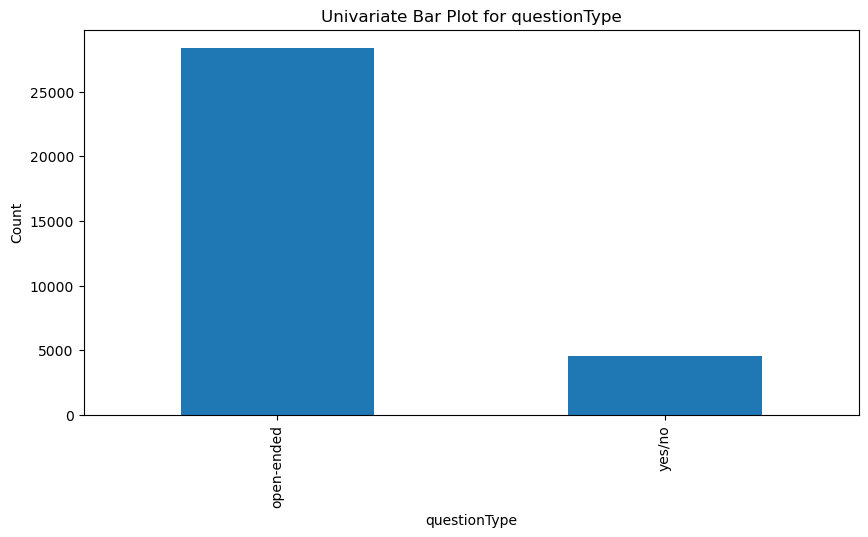

In [6]:
import matplotlib.pyplot as plt

def univariate_bar_plot(data, column):
    """
    Create a univariate bar graph for a specific column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, the column for which to create the bar graph
    """
    plt.figure(figsize=(10, 5))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Univariate Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Example usage:
# Assuming 'questionType' is a column in your DataFrame 'df'
univariate_bar_plot(df, 'questionType')

In [7]:
data = df.copy()
data
# askerID,questionTime, asin

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A3VTSR929E3J0R,"December 26, 2013",May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES
1,open-ended,A1LZ5DJ7AJYAXD,"April 26, 2014",Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES
2,yes/no,A1ER8W5FAQM6G5,"July 11, 2014","How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES
3,open-ended,A1P403R4I7LVPU,"December 20, 2013",How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2
4,open-ended,A166KM8A5H1Z2O,"February 26, 2014",I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2
...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,"July 2, 2014",is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO
32932,yes/no,A3LMNODD16O8J6,"July 2, 2014",I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO
32933,yes/no,A13S7ZT69W96HR,"July 2, 2014",is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO
32934,open-ended,A1HHOCBWVDXSE,"July 2, 2014",how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO


In [8]:
new_df = data[['questionType', 'questionText', "answers"]]
new_df

,questionType,questionText,answers
0,open-ended,May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...
1,open-ended,Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...
2,yes/no,"How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...
3,open-ended,How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...
4,open-ended,I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...
...,...,...,...
32931,yes/no,is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...
32932,yes/no,I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ..."
32933,yes/no,is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...
32934,open-ended,how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...


In [9]:
# Assuming df is your DataFrame with the 'answers' column
new_df['answerText'] = new_df['answers'].apply(lambda x: x[0]['answerText'] if x else None)

# Drop the 'answers' column
new_df = new_df.drop(columns=['answers'])


C:\Users\hp\AppData\Local\Temp\ipykernel_3264\4267083081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['answerText'] = new_df['answers'].apply(lambda x: x[0]['answerText'] if x else None)


In [10]:
new_df

,questionType,questionText,answerText
0,open-ended,May I request for a manual instruction on this...,Homedics has a complete list of instruction ma...
1,open-ended,Having problems with the heater melting the wa...,I leave the unit on all the time so it is alwa...
2,yes/no,"How much wax (in pounds, for instance) does it...","It came with the proper amount of wax, but thi..."
3,open-ended,How to know the expired date of this product?,The expiration date is on the bottom of the pl...
4,open-ended,I am not in the sun as I work inside. I am new...,This product is awesome. I dont spend a lot of...
...,...,...,...
32931,yes/no,is Argan Oil Pure 100% good for Skin?,I really like it. It is a non greasy moisturi...
32932,yes/no,I find myself with rough cuticles right around...,"Yes, you can. In the evening before you go to ..."
32933,yes/no,is it good for nail beauty?,I would say it's good for cuticles. I can't s...
32934,open-ended,how can i use it for Topical Use on Dry Hair?,"A little goes a long way! A drop or two, depe..."


In [11]:
new_df['questionText'].loc[5]

'can i put this on a toddler skin?'

In [12]:
new_df['answerText'].loc[5]

"You could put it on a toddler's skin.. but not below 6 months.  It's for sensitive skin and SPF 15 Sunscreen.  My little 5 yr old uses it, and it's fine.  On the bottle, says vitamin E and aloe. Hope it helps ;)"

In [13]:
new_df.columns

Index(['questionType', 'questionText', 'answerText'], dtype='object')

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np



# Assuming df1 is your DataFrame with columns 'questionType', 'questionText', and 'answerText'
# Replace this with your actual DataFrame
# df1 = ...

# Tokenize and lemmatize the text data
lemmatizer = WordNetLemmatizer()
new_df['lemmatizedText'] = new_df.apply(lambda row: ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(row['questionText'] + ' ' + row['answerText'])]), axis=1)

# Create a list of question types
question_types = new_df['questionType'].unique()

# Create training data for each question type
training_data = []
for question_type in question_types:
    subset_df = new_df[new_df['questionType'] == question_type]

    # Create bag of words representation for each question
    for index, row in subset_df.iterrows():
        bag = row['lemmatizedText']
        output_row = [0] * len(question_types)
        output_row[np.where(question_types == question_type)[0][0]] = 1
        training_data.append([bag, output_row])

# Separate bags of words and output rows
bags_of_words = [item[0] for item in training_data]
output_rows = [item[1] for item in training_data]

# Convert to numerical data using Count Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(bags_of_words)
numerical_data = X.toarray()

# Separate features (X) and labels (Y)
train_x = numerical_data
train_y = np.array(output_rows)

print("\nTraining data created")

MemoryError: Unable to allocate 5.92 GiB for an array with shape (32936, 24136) and data type int64

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_x, train_y)

# Predict on the test set
rf_predictions = rf_classifier.predict(test_x)

# Calculate test accuracy
rf_test_accuracy = accuracy_score(test_y, rf_predictions)
print(f"\nRandom Forest Test Accuracy: {rf_test_accuracy}")

NameError: name 'train_x' is not defined

: 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Create model
model = Sequential()
model.add(Dense(128, input_shape=(train_x.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_y.shape[1], activation='softmax'))
print("First layer:",model.layers[0].get_weights()[0])

: 

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

: 

In [ ]:
# Fitting the model
hist = model.fit(train_x, train_y, epochs=200, batch_size=5, verbose=1)

# # Saving the model
model.save('chatbot_model.h5', hist)

print("Model created")

: 

In [ ]:
'''greet_inputs = ("hello", "hi","whassup","hey","howdy","hola","good day", "good morning","good afternoon","good evening")
greet_response = ("hello", "hi","how can i help you")
def greet(sentence):
    for word in sentence.split():
        if word.lower() in greet_inputs:
            return random.choice(greet_response)

: 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np



# Assuming df1 is your DataFrame with columns 'questionType', 'questionText', and 'answerText'
# Replace this with your actual DataFrame
# df1 = ...

# Tokenize and lemmatize the text data
lemmatizer = WordNetLemmatizer()
new_df['lemmatizedText'] = new_df.apply(lambda row: ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(row['questionText'] + ' ' + row['answerText'])]), axis=1)

# Create a list of question types
question_types = new_df['questionType'].unique()

# Create training data for each question type
training_data = []
for question_type in question_types:
    subset_df = new_df[new_df['questionType'] == question_type]

    # Create bag of words representation for each question
    for index, row in subset_df.iterrows():
        bag = row['lemmatizedText']
        output_row = [0] * len(question_types)
        output_row[np.where(question_types == question_type)[0][0]] = 1
        training_data.append([bag, output_row])

# Separate bags of words and output rows
bags_of_words = [item[0] for item in training_data]
output_rows = [item[1] for item in training_data]

# Convert to numerical data using Count Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(bags_of_words)
numerical_data = X.toarray()

# Separate features (X) and labels (Y)
train_x = numerical_data
train_y = np.array(output_rows)

print("\nTraining data created")

: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(train_x, train_y)

# Predict on the test set
rf_predictions = rf_classifier.predict(test_x)

# Calculate test accuracy
rf_test_accuracy = accuracy_score(test_y, rf_predictions)
print(f"\nRandom Forest Test Accuracy: {rf_test_accuracy}")

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 